In [224]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import timeit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

from sklearn import model_selection
from sklearn.experimental import enable_halving_search_cv
from sklearn import dummy
from sklearn import neighbors, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import kernel_ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import subplots
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [225]:
# Mis en l'échelle logarithmetique
from sklearn.preprocessing import FunctionTransformer

In [273]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import re

In [227]:
#Importation de jeu de données :
data=pd.read_csv("Seattle")

### Algorithmes de prédiction


### Choix de la **métrique** et Régresseur naïf (modèle de référence)
Comme métrique d'évaluation, nous utilisons le **coefficient de détermination R²** pour lequel le meilleur score est 1. Ce coefficient mesure la proportion de la variance de la variable dépendante expliquée par les variables indépendantes.

$$R^{2} = 1 - \frac{\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}{\sum\limits_{i=1}^n (y_i - \bar{y})^2}$$

**Remarque :** en raison de ce choix, nous n'avons pas besoin d'entraîner un **modèle naïf** de référence. En effet, un régresseur naïf prédisant la valeur moyenne des étiquette, obtiendra un **score R² de 0**.

In [229]:
X = data.drop(["TotalGHGEmissions","SiteEnergyUseWN(kBtu)"],axis=1)
y = data["TotalGHGEmissions"]
#répartition des données en données train et données test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
#normaliser les données de sorte que les variables auront μ = 0 et σ = 1
std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)


Pour avoir le meilleur algorithme de prediction de la comsommation des emissions du CO2 et de l'energy, je vais créer un modèle de base appelé baselin avec la regression Dummy qui permettra de faire des comparaison entre ce modèle baseline et les autres algorithme de prediction.

### 1.Regression Dummy 

In [230]:
start_time = timeit.default_timer()
dum = dummy.DummyRegressor(strategy='mean')
dum.fit(X_train_std, y_train)

y_pred_dum = dum.predict(X_test_std)
temps_exec_Dummy = timeit.default_timer() - start_time

R2_Dummy = metrics.r2_score(y_test, y_pred_dum)
RMSE_Dummy = metrics.mean_squared_error(y_test, y_pred_dum,squared=False)
MAE_Dummy = metrics.mean_absolute_error(y_test, y_pred_dum)

print("R2 de l'algorithme Dummy sur le jeu de test : {:.2f}".format(metrics.r2_score(y_test, y_pred_dum)))
print("RMSE de l'algorithme Dummy sur le jeu de test : {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_dum,squared=False)))
print("MAE de l'algorithme Dummy sur le jeu de test : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_dum)))
print("Le temps d'execution de l'algorithme Dummy sur le jeu de test : {:.2f}s".format(temps_exec_Dummy))

R2 de l'algorithme Dummy sur le jeu de test : -0.00
RMSE de l'algorithme Dummy sur le jeu de test : 982.81
MAE de l'algorithme Dummy sur le jeu de test : 224.97
Le temps d'execution de l'algorithme Dummy sur le jeu de test : 0.00s


Avec l'algorithme Dummy que j'ai utilisé comme modèle baseline ne predit pas éfficacemennt car les valeurs des metriques R2, RMSE et MAE sont mauvaises.

## 2. Regression Random Forest

In [231]:
#On va tester Random Forest avec les parametres par defaut

In [232]:
start_time = timeit.default_timer()
model_forest_par_defaut = RandomForestRegressor()
model_forest_par_defaut.fit(X_train_std, y_train)

y_pred_forest = model_forest_par_defaut.predict(X_test_std)
temps_exec_forest = timeit.default_timer() - start_time

R2_forest = metrics.r2_score(y_test, y_pred_forest)
RMSE_forest = metrics.mean_squared_error(y_test, y_pred_forest,squared=False)
MAE_forest = metrics.mean_absolute_error(y_test, y_pred_forest)

print("R2 de l'algorithme Regression Random Forest sur le jeu de test avec les parametres par defaut: {:.2f}".format(metrics.r2_score(y_test, y_pred_dum)))
print("RMSE de l'algorithme Regression Random Forest sur le jeu de test avec les parametres par defaut: : {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_dum,squared=False)))
print("MAE de l'algorithme Dummy sur le jeu de test avec les parametres par defaut: : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_dum)))
print("Le temps d'execution de l'algorithme Random Forest sur le jeu de tes tavec les parametres par defaut:  : {:.2f}s".format(temps_exec_Dummy))

R2 de l'algorithme Regression Random Forest sur le jeu de test avec les parametres par defaut: -0.00
RMSE de l'algorithme Regression Random Forest sur le jeu de test avec les parametres par defaut: : 982.81
MAE de l'algorithme Dummy sur le jeu de test avec les parametres par defaut: : 224.97
Le temps d'execution de l'algorithme Random Forest sur le jeu de tes tavec les parametres par defaut:  : 0.00s


In [233]:
param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}
score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error,squared=False)}
#score = ('r2','neg_mean_absolute_error','neg_root_mean_squared_error' )

model_forest = RandomForestRegressor(random_state=42)

start_time_forest = timeit.default_timer()
grid_pred_forest = model_selection.GridSearchCV(
    model_forest,
    param_grid,
    refit='r2',
    cv=5,  
    scoring= score)


grid_pred_forest.fit(X_train, y_train)

y_hat_forest = grid_pred_forest.predict(X_test)

temps_exec_forest = timeit.default_timer() - start_time_forest


In [234]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement de la cible TotalGHGEmissions:")
print(grid_pred_forest.best_params_)

print("Résultats de la validation croisée de la régression ridge pour:")
for mean_r2, std_r2, params in zip(
        grid_pred_forest.cv_results_['mean_test_r2'], 
        grid_pred_forest.cv_results_['std_test_r2'], 
        grid_pred_forest.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )

    

#Le coefficient de détermination R2
R2_best_forest = max(grid_pred_forest.cv_results_['mean_test_r2'])
#La MAE moyenne arithmétique des valeurs absolues des écarts 
MAE_best_forest = min(grid_pred_forest.cv_results_['mean_test_neg_mean_absolute_error'])
#L'erreur quadratique 
RMSE_best_forest = min(grid_pred_forest.cv_results_['mean_test_neg_root_mean_squared_error'])

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement de la cible TotalGHGEmissions:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Résultats de la validation croisée de la régression ridge pour:
r2 = 0.475 (+/-0.058) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
r2 = 0.555 (+/-0.085) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
r2 = 0.545 (+/-0.086) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
r2 = 0.569 (+/-0.093) for {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}
r2 = 0.527 (+/-0.098) for {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
r2 = 0.541 (+/-0.086) for {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
r2 = 0.519 (+/-0.116) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}
r2 = 0.613 (+/-0.096) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
r2 = 0.607 (+/-0.090) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators':

In [235]:
print("- Voici les résultats obtenus avec l'algorithme Random Forest :")
print("Les meilleurs paramètres obtenus avec la méthode Random Forest sont", grid_pred_forest.best_params_)
RMSE_best_forest = min(grid_pred_forest.cv_results_['mean_test_neg_root_mean_squared_error'])
R2_best_forest = max(grid_pred_forest.cv_results_['mean_test_r2'])
MAE_best_forest = min(grid_pred_forest.cv_results_['mean_test_neg_mean_absolute_error'])
print("Le meilleur coefficient de détermination R2 : {:.2f}".format(R2_best_forest))
print("Le meilleur RMSE de l'algorithme : {:.2f}".format(RMSE_best_forest))
print("Le meilleur MAE de l'algorithme : {:.2f}".format(MAE_best_forest))
print("Le temps d'execution de l'algorithme  sur le jeu de test : {:.2f}s".format(temps_exec_forest))

- Voici les résultats obtenus avec l'algorithme Random Forest :
Les meilleurs paramètres obtenus avec la méthode Random Forest sont {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Le meilleur coefficient de détermination R2 : 0.61
Le meilleur RMSE de l'algorithme : 367.76
Le meilleur MAE de l'algorithme : 109.48
Le temps d'execution de l'algorithme  sur le jeu de test : 29.53s


In [236]:
#Le coefficient de détermination R2
R2_test_forest = max(grid_pred_forest.cv_results_['mean_test_r2'])
#La MAE moyenne arithmétique des valeurs absolues des écarts 
MAE_test_forest = min(grid_pred_forest.cv_results_['mean_test_neg_mean_absolute_error'])
#L'erreur quadratique 
RMSE_test_forest = min(grid_pred_forest.cv_results_['mean_test_neg_root_mean_squared_error'])
print(' Performance de la Regression Random Forest sur la base de testing')
print("Temps ecoulé : {:.2f}s".format(elapsed_time_forest))
print("RMSE_forest : {:.2f}".format(RMSE_test_forest))
print('R2_forest : {:.2f}'.format(R2_test_forest))
print('MAE_forest : {:.2f}'.format(temps_exec_forest))
print("\n")

 Performance de la Regression Random Forest sur la base de testing
Temps ecoulé : 90.79s
RMSE_forest : 367.76
R2_forest : 0.61
MAE_forest : 29.53




### 3.Régression linéaire 

- Voici les résultats obtenus avec l'algorithme Linear Regression sur le test :
Coefficient de détermination R2  : 0.10
RMSE: 932.69
MAE : 175.22
Le temps d'execution de l'algorithme: 0.01s


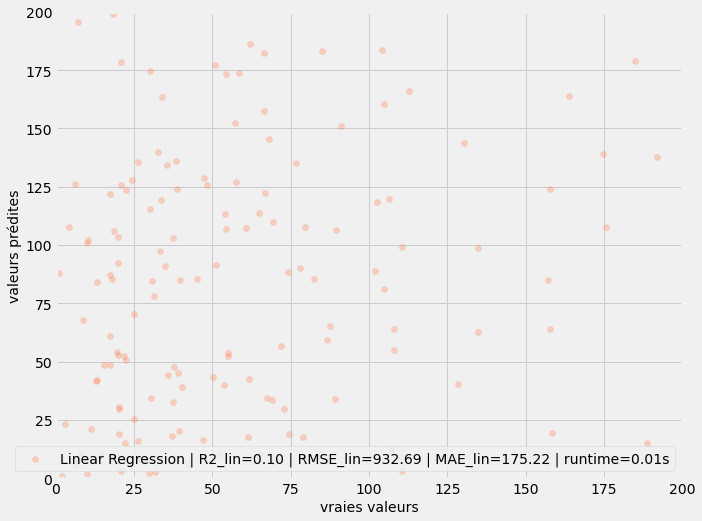

In [237]:
start_time = timeit.default_timer()
reg = LinearRegression().fit(X_train_std,y_train)
y_pred_reg = reg.predict(X_test_std)
temps_exec_lin = timeit.default_timer() - start_time 
#calculer le temps de l'éxecution de l'algorithme

R2_lin = metrics.r2_score(y_test, y_pred_reg)
RMSE_lin = metrics.mean_squared_error(y_test, y_pred_reg,squared=False)
MAE_lin = metrics.mean_absolute_error(y_test, y_pred_reg)

fig = plt.figure(figsize=(10,8))

plt.scatter(y_test,y_pred_reg,alpha=0.3,color='coral', label= "Linear Regression | R2_lin={:.2f} | RMSE_lin={:.2f} | MAE_lin={:.2f} | runtime={:.2f}s".format(R2_lin,RMSE_lin,MAE_lin,temps_exec_lin))
plt.ylim([0, 200])
plt.xlim([0, 200])
plt.xlabel('vraies valeurs', fontsize=14,)
plt.ylabel('valeurs prédites', fontsize=14)
plt.legend(loc="lower right")

print("- Voici les résultats obtenus avec l'algorithme Linear Regression sur le test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_reg)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_reg,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_reg)))
print("Le temps d'execution de l'algorithme: {:.2f}s".format(temps_exec_lin))

In [238]:
# la racine carré des moyenne des carrés des erreurs.
RMSE_test_RL = np.sqrt(mean_squared_error(y_test, y_pred_reg))

#La moyenne arithmétique des valeurs absolues des écarts 
MAE_test_RL = mean_absolute_error(y_test, y_pred_reg)
R2_test_RL = r2_score(y_test, y_pred_reg)
print("- Voici les résultats obtenus avec l'algorithme Linear Regression sur le test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_reg)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_reg,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_reg)))
print("Le temps d'execution de l'algorithme: {:.2f}s".format(temps_exec_lin))

- Voici les résultats obtenus avec l'algorithme Linear Regression sur le test :
Coefficient de détermination R2  : 0.10
RMSE: 932.69
MAE : 175.22
Le temps d'execution de l'algorithme: 0.01s


L'algorithme de régression linéaire permet de prédire un peu mieux les émissions de CO2 par rapport à l'algorithme Dummy mais globalement les résultats des métriques ne sont pas bonnes

### 4.Régression Ridge / Ridge regression (modèle linéaire)

In [239]:
#On va tester Régression Ridge avec les parametres par defaut

In [240]:
grid_par_defaut = Ridge()
grid_par_defaut.fit(X_train_std, y_train)

y_pred_rdg_par_defaut = grid_par_defaut.predict(X_test_std)

temps_exec_Ridge1 = timeit.default_timer() - start_time
print("- Voici les résultats obtenus avec l'algorithme Ridge sur le test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_rdg_par_defaut)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_rdg_par_defaut,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_rdg_par_defaut)))
print("Le temps d'execution de l'algorithme: {:.2f}s".format(temps_exec_Ridge1))

- Voici les résultats obtenus avec l'algorithme Ridge sur le test :
Coefficient de détermination R2  : 0.10
RMSE: 932.72
MAE : 175.17
Le temps d'execution de l'algorithme: 0.28s


In [241]:
alpha_range = np.logspace(-2, 2, 5)

param_grid = {'alpha': alpha_range}

score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error,squared=False)}


start_time = timeit.default_timer()
grid_pred_rdg = model_selection.GridSearchCV(
        Ridge(random_state=42),
        param_grid,
        cv=5,
        refit="r2",
        scoring=score)
                                    
grid_pred_rdg.fit(X_train_std, y_train)

y_pred_rdg = grid_pred_rdg.predict(X_test_std)

temps_exec_Ridge1 = timeit.default_timer() - start_time

In [242]:
print("Résultats de la validation croisée de la régression ridge sur le jeu d'entraînement:")
for mean_r2, std_r2, params in zip(
        grid_pred_rdg.cv_results_['mean_test_r2'], 
        grid_pred_rdg.cv_results_['std_test_r2'], 
        grid_pred_rdg.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_pred_rdg.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_pred_rdg.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_pred_rdg.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_pred_rdg.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_pred_rdg.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_pred_rdg.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))

Résultats de la validation croisée de la régression ridge sur le jeu d'entraînement:
r2 = 0.346 (+/-0.297) for {'alpha': 0.01}
r2 = 0.346 (+/-0.297) for {'alpha': 0.1}
r2 = 0.347 (+/-0.296) for {'alpha': 1.0}
r2 = 0.355 (+/-0.288) for {'alpha': 10.0}
r2 = 0.420 (+/-0.217) for {'alpha': 100.0}
MAE = 156.136 (+/-13.513) for {'alpha': 0.01}
MAE = 156.126 (+/-13.514) for {'alpha': 0.1}
MAE = 156.026 (+/-13.523) for {'alpha': 1.0}
MAE = 155.058 (+/-13.620) for {'alpha': 10.0}
MAE = 148.083 (+/-15.431) for {'alpha': 100.0}
RMSE = 422.046 (+/-135.109) for {'alpha': 0.01}
RMSE = 422.029 (+/-135.126) for {'alpha': 0.1}
RMSE = 421.858 (+/-135.298) for {'alpha': 1.0}
RMSE = 420.220 (+/-137.003) for {'alpha': 10.0}
RMSE = 408.629 (+/-152.455) for {'alpha': 100.0}


La régularisation Ridge permet une meilleur prédiction que la régression linéaire au niveau du résultat du RMSE

In [243]:
print("- Les résultats obtenus avec l'algorithme Kernel Ridge Regression en utilisant un noyau de type \n Radial Basis Function (RBF) :")
print("Les meilleurs paramètres obtenus sont", grid_pred_rdg.best_params_)
best_RMSE_Ridge1 = min(grid_pred_rdg.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_Ridge1 = max(grid_pred_rdg.cv_results_['mean_test_r2'])
best_MAE_Ridge1 = min(grid_pred_rdg.cv_results_['mean_test_neg_mean_absolute_error'])
print("Le meilleur coefficient de détermination R2 : {:.2f}".format(best_R2_Ridge1))
print("Le meilleur RMSE: {:.2f}".format(best_RMSE_Ridge1))
print("Le meilleur MAE : {:.2f}".format(best_MAE_Ridge1))
print("Le temps d'execution de l'algorithme Kernel Ridge Regression sur le jeu de test : {:.2f}s".format(temps_exec_Ridge1))

- Les résultats obtenus avec l'algorithme Kernel Ridge Regression en utilisant un noyau de type 
 Radial Basis Function (RBF) :
Les meilleurs paramètres obtenus sont {'alpha': 100.0}
Le meilleur coefficient de détermination R2 : 0.42
Le meilleur RMSE: 408.63
Le meilleur MAE : 148.08
Le temps d'execution de l'algorithme Kernel Ridge Regression sur le jeu de test : 0.10s


### 5.Régression Ridge à noyau / Kernel Ridge regression ( Modèle non linéaire)

In [244]:
#On va tester Random Forest avec les parametres par defaut

In [245]:
from sklearn.kernel_ridge import KernelRidge


In [246]:
start_time = timeit.default_timer()
grid_pred_krdg = KernelRidge(alpha=1)
grid_pred_krdg.fit(X_train_std, y_train) #application de l'algorithme de prédiction sur les données train

y_pred_krdg_par_defaut = grid_pred_krdg.predict(X_test_std) #prédiction des valeurs des émissions avec les données test
temps_exec_Ridge2 = timeit.default_timer() - start_time #calcule du temps de d'éxecution de l'algorithme

print("- Voici les résultats obtenus avec l'algorithme Ridge sur le test  en utilisant les parametres par defaut:")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_rdg_par_defaut)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_rdg_par_defaut,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_rdg_par_defaut)))
print("Le temps d'execution de l'algorithme: {:.2f}s".format(temps_exec_Ridge1))

- Voici les résultats obtenus avec l'algorithme Ridge sur le test  en utilisant les parametres par defaut:
Coefficient de détermination R2  : 0.10
RMSE: 932.72
MAE : 175.17
Le temps d'execution de l'algorithme: 0.10s


Résultats de la validation croisée de la régression ridge à noyau sur le jeu d'entraînement:
r2 = 0.655 (+/-0.073) for {'alpha': 0.01, 'gamma': 0.01}
r2 = 0.045 (+/-0.059) for {'alpha': 0.01, 'gamma': 0.1}
r2 = -0.056 (+/-0.033) for {'alpha': 0.01, 'gamma': 1.0}
r2 = -0.111 (+/-0.043) for {'alpha': 0.01, 'gamma': 10.0}
r2 = 0.670 (+/-0.035) for {'alpha': 0.1, 'gamma': 0.01}
r2 = 0.070 (+/-0.081) for {'alpha': 0.1, 'gamma': 0.1}
r2 = -0.053 (+/-0.030) for {'alpha': 0.1, 'gamma': 1.0}
r2 = -0.112 (+/-0.044) for {'alpha': 0.1, 'gamma': 10.0}
r2 = 0.614 (+/-0.070) for {'alpha': 1.0, 'gamma': 0.01}
r2 = 0.055 (+/-0.071) for {'alpha': 1.0, 'gamma': 0.1}
r2 = -0.068 (+/-0.019) for {'alpha': 1.0, 'gamma': 1.0}
r2 = -0.115 (+/-0.048) for {'alpha': 1.0, 'gamma': 10.0}
r2 = 0.356 (+/-0.114) for {'alpha': 10.0, 'gamma': 0.01}
r2 = -0.026 (+/-0.011) for {'alpha': 10.0, 'gamma': 0.1}
r2 = -0.105 (+/-0.040) for {'alpha': 10.0, 'gamma': 1.0}
r2 = -0.121 (+/-0.052) for {'alpha': 10.0, 'gamma': 10.0}
r2

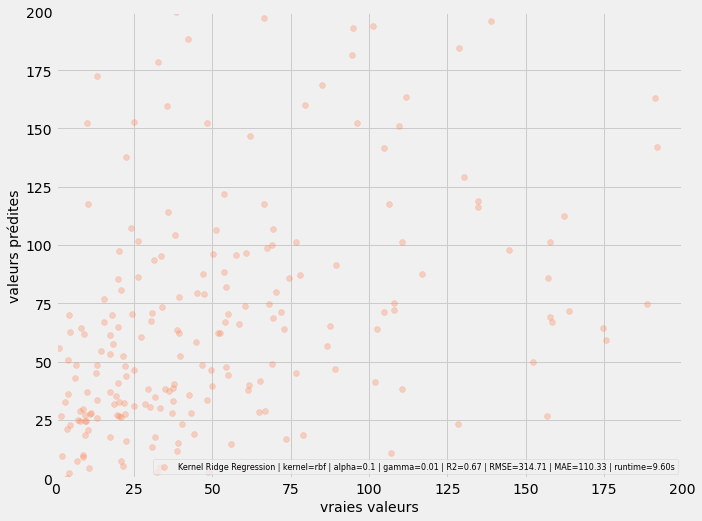

In [247]:
alpha_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 1, 4)
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
#range des hyperparamètres à évaluer

score = {'r2':make_scorer(r2_score),\
         'neg_mean_absolute_error':make_scorer(mean_absolute_error),\
         'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False)}
#différents métriques utilisés

start_time = timeit.default_timer()
grid_pred_krdg = model_selection.GridSearchCV( # recherche des meilleurs hyperparamètres avec GridSearchGrid
        kernel_ridge.KernelRidge(kernel='rbf'),
        param_grid,
        cv=5,
        refit="r2",
        scoring=score)
                                    
grid_pred_krdg.fit(X_train_std, y_train) #application de l'algorithme de prédiction sur les données train

y_pred_krdg = grid_pred_krdg.predict(X_test_std) #prédiction des valeurs des émissions avec les données test
temps_exec_Ridge2 = timeit.default_timer() - start_time #calcule du temps de d'éxecution de l'algorithme

print("Résultats de la validation croisée de la régression ridge à noyau sur le jeu d'entraînement:")
for mean_r2, std_r2, params in zip(
        grid_pred_krdg.cv_results_['mean_test_r2'], 
        grid_pred_krdg.cv_results_['std_test_r2'], 
        grid_pred_krdg.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_pred_krdg.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_pred_krdg.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_pred_krdg.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_pred_krdg.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_pred_krdg.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_pred_krdg.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))
    
best_RMSE_Ridge2 = min(grid_pred_krdg.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_Ridge2 = max(grid_pred_krdg.cv_results_['mean_test_r2'])
best_MAE_Ridge2 = min(grid_pred_krdg.cv_results_['mean_test_neg_mean_absolute_error'])

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_krdg,alpha=0.3,color='coral',label= "Kernel Ridge Regression | kernel=rbf | alpha=0.1 | gamma=0.01 | R2={:.2f} | RMSE={:.2f} | MAE={:.2f} | runtime={:.2f}s".format(best_R2_Ridge2,best_RMSE_Ridge2,best_MAE_Ridge2,temps_exec_Ridge2))
plt.xlim([0,200])
plt.ylim([0,200])
plt.xlabel('vraies valeurs', fontsize=14)
plt.ylabel('valeurs prédites', fontsize=14)
plt.legend(loc="lower right", prop = {'size': 8})

In [248]:
print("- Voici les résultats obtenus avec l'algorithme Kernel Ridge Regression en utilisant un noyau de type \n Radial Basis Function (RBF) :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", grid_pred_krdg.best_params_)
best_RMSE_Ridge2 = min(grid_pred_krdg.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_Ridge2 = max(grid_pred_krdg.cv_results_['mean_test_r2'])
best_MAE_Ridge2 = min(grid_pred_krdg.cv_results_['mean_test_neg_mean_absolute_error'])
print("Le meilleur coefficient de détermination R2 : {:.2f}".format(best_R2_Ridge2))
print("Le meilleur RMSE de l'algorithme : {:.2f}".format(best_RMSE_Ridge2))
print("Le meilleur MAE de l'algorithme : {:.2f}".format(best_MAE_Ridge2))
print("Le temps d'execution de l'algorithme sur le jeu de test : {:.2f}s".format(temps_exec_Ridge2))

- Voici les résultats obtenus avec l'algorithme Kernel Ridge Regression en utilisant un noyau de type 
 Radial Basis Function (RBF) :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'alpha': 0.1, 'gamma': 0.01}
Le meilleur coefficient de détermination R2 : 0.67
Le meilleur RMSE de l'algorithme : 314.71
Le meilleur MAE de l'algorithme : 110.33
Le temps d'execution de l'algorithme sur le jeu de test : 9.60s


La Regression Ridge à noyau RBF permets d'obtenir des résultats plus intéressants avec tout les métriques par rapport à la regression linéaire et la regression Ridge à noyau linéaire mais le temps d'exécusion de l'estimateur est un peu plus long**

### 6.Méthode des k plus proches voisins / k-nearest neighbors algorithm

In [249]:
#On va tester  k plus proches voisins avec les parametres par defaut

In [251]:
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train_std, y_train)
y_pred_par_defaut = knn.predict(X_test_std)
print("- Voici les résultats obtenus avec l'algorithme k plus proches voisins par defaut sur le  jeu de test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_par_defaut)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_par_defaut,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_par_defaut)))

- Voici les résultats obtenus avec l'algorithme k plus proches voisins par defaut sur le  jeu de test :
Coefficient de détermination R2  : 0.01
RMSE: 976.37
MAE : 167.51


In [252]:
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}
score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error,squared=False)}
start_time = timeit.default_timer()
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),
    param_grid,
    refit='r2',
    cv=5,           
    scoring=score)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
temps_exec_Knn = timeit.default_timer() - start_time

print("Meilleur hyperparamètre sur le jeu d'entraînement:")
print(clf.best_params_)
best_RMSE_knn = min(clf.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_knn = max(clf.cv_results_['mean_test_r2'])
best_MAE_knn = min(clf.cv_results_['mean_test_neg_mean_absolute_error'])

print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_r2'], 
        clf.cv_results_['std_test_r2'],  
        clf.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean,
        std,
        params
    ) )
for mean_mae, std_mae, params in zip(
        clf.cv_results_['mean_test_neg_mean_absolute_error'], 
        clf.cv_results_['std_test_neg_mean_absolute_error'], 
        clf.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        clf.cv_results_['mean_test_neg_root_mean_squared_error'], 
        clf.cv_results_['std_test_neg_root_mean_squared_error'], 
        clf.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))

print("Le temps d'execution de l'algorithme sur le jeu de test : {:.2f}".format(temps_exec_Knn))   

Meilleur hyperparamètre sur le jeu d'entraînement:
{'n_neighbors': 11}
Résultats de la validation croisée :
r2 = 0.281 (+/-0.314) for {'n_neighbors': 3}
r2 = 0.441 (+/-0.199) for {'n_neighbors': 5}
r2 = 0.444 (+/-0.249) for {'n_neighbors': 7}
r2 = 0.477 (+/-0.072) for {'n_neighbors': 9}
r2 = 0.509 (+/-0.072) for {'n_neighbors': 11}
r2 = 0.504 (+/-0.097) for {'n_neighbors': 13}
r2 = 0.486 (+/-0.111) for {'n_neighbors': 15}
MAE = 129.592 (+/-19.986) for {'n_neighbors': 3}
MAE = 123.818 (+/-19.996) for {'n_neighbors': 5}
MAE = 124.956 (+/-22.304) for {'n_neighbors': 7}
MAE = 125.282 (+/-24.475) for {'n_neighbors': 9}
MAE = 124.823 (+/-26.836) for {'n_neighbors': 11}
MAE = 125.326 (+/-27.842) for {'n_neighbors': 13}
MAE = 125.584 (+/-29.290) for {'n_neighbors': 15}
RMSE = 425.615 (+/-98.151) for {'n_neighbors': 3}
RMSE = 394.543 (+/-139.798) for {'n_neighbors': 5}
RMSE = 403.566 (+/-175.813) for {'n_neighbors': 7}
RMSE = 409.873 (+/-197.470) for {'n_neighbors': 9}
RMSE = 407.595 (+/-221.76

In [253]:
print("Voici les résultats obtenus avec l'algorithme KNN Regressor :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", clf.best_params_)
print("Le meilleur coefficient de détermination R2 de l'algorithme KNN sur le jeu de test : {:.2f}".format(best_R2_knn))
print("Le meilleur RMSE de l'algorithme KNN sur le jeu de test : {:.2f}".format(best_RMSE_knn))
print("Le meilleur MAE de l'algorithme KNN sur le jeu de test : {:.2f}".format(best_MAE_knn))
print("Le temps d'execution de l'algorithme KNN sur le jeu de test : {:.2f}s".format(temps_exec_Knn))

Voici les résultats obtenus avec l'algorithme KNN Regressor :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'n_neighbors': 11}
Le meilleur coefficient de détermination R2 de l'algorithme KNN sur le jeu de test : 0.51
Le meilleur RMSE de l'algorithme KNN sur le jeu de test : 394.54
Le meilleur MAE de l'algorithme KNN sur le jeu de test : 123.82
Le temps d'execution de l'algorithme KNN sur le jeu de test : 0.41s


**Le modèle KNN nous donne un résultat plus intéressant au niveau de l'écart quadratique moyen RMSE pour lequel on observe une diminution importante par rapport au modèles Ridge**

### 7.L'algorithme du gradient boosting / Gradient Boosting Regressor


C’est une méthode qui permet de transformer les apprenants faibles en apprenants forts
Ce boosting consiste à assembler plusieurs algorithmes ayant une performance peu élevée pour en créer un beaucoup plus efficace. Dans le cadre de la régression, les variables à prédire vont être estimées avec un premier modèle, puis les résidus de ce modèle deviendront les variables cible du second modèle, et ainsi de suite.


Plutôt que d’utiliser un seul modèle, nous en utilisons plusieurs que nous agrégeons ensuite pour obtenir un seul résultat. Dans  la construction des modèles, le Boosting travaille de manière séquentielle. Il commence par construire un premier modèle qu’il va évaluer. A partir de cette mesure, chaque individu va être pondéré en fonction de la performance de la prédiction. L’objectif est de donner un poids plus important aux individus pour lesquels la valeur a été mal prédite pour la construction du modèle suivant. Le fait de corriger les poids au fur et à mesure permet de mieux prédire les valeurs difficiles.

In [254]:
#On va tester gradient boosting avec les parametres par defaut

In [255]:
boosting_par_defaut =  GradientBoostingRegressor()
boosting_par_defaut.fit(X_train_std, y_train)

y_pred_xboost_par_defaut = boosting_par_defaut.predict(X_test_std)
print("- Voici les résultats obtenus avec l'algorithme  gradient boosting  par defaut sur le  jeu de test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_xboost_par_defaut)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_xboost_par_defaut,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_xboost_par_defaut)))

- Voici les résultats obtenus avec l'algorithme  gradient boosting  par defaut sur le  jeu de test :
Coefficient de détermination R2  : 0.14
RMSE: 909.90
MAE : 141.07


Les meilleurs paramètres de l'algorithme XGBoost sont {'learning_rate': 0.06999999999999999, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.5}
Résultats de la validation croisée de le boost gradient pour:
r2 = 0.450 (+/-0.143) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
r2 = 0.491 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
r2 = 0.411 (+/-0.130) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.1}
r2 = 0.458 (+/-0.251) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
r2 = 0.550 (+/-0.094) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
r2 = 0.520 (+/-0.119) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.1}
r2 = 0.496 (+/-0.227) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
r2 = 0.505 (+/-0.092) for {'learning_rate': 0.01, 'max

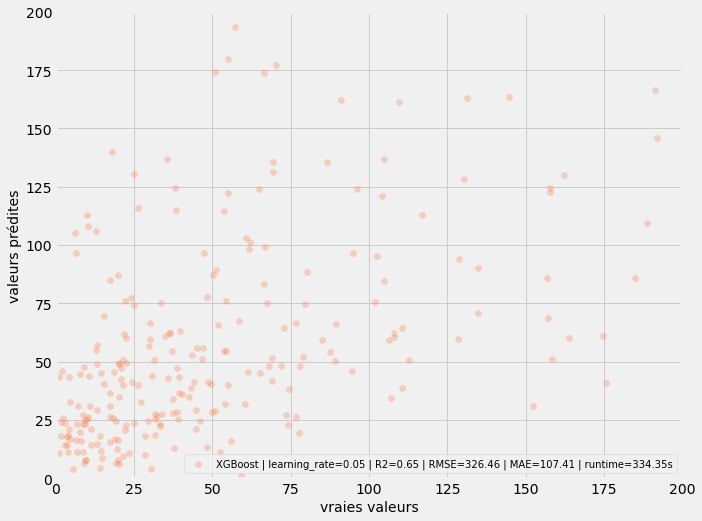

In [256]:
subsample = [0.9,0.5,0.1]
n_estimators = [100,200]
max_depth = [3,5,8,10]
learning_range = np.arange(0.01,0.11,0.01)

param_grid = {'max_depth':max_depth,'learning_rate':learning_range,'subsample':subsample,'n_estimators':n_estimators}

score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False)}


start_time = timeit.default_timer()
grid_pred_xboost = model_selection.GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid,
        cv=5,
        refit="r2",
        scoring=score)
                                    
grid_pred_xboost.fit(X_train_std, y_train)

y_pred_xboost = grid_pred_xboost.predict(X_test_std)

temps_exec_boost = timeit.default_timer() - start_time

print ("Les meilleurs paramètres de l'algorithme XGBoost sont",grid_pred_xboost.best_params_)
print("Résultats de la validation croisée de le boost gradient pour:")
for mean_r2, std_r2, params in zip(
        grid_pred_xboost.cv_results_['mean_test_r2'], 
        grid_pred_xboost.cv_results_['std_test_r2'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_pred_xboost.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_pred_xboost.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_pred_xboost.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_pred_xboost.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))

best_RMSE_boost = min(grid_pred_xboost.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_boost = max(grid_pred_xboost.cv_results_['mean_test_r2'])
best_MAE_boost = min(grid_pred_xboost.cv_results_['mean_test_neg_mean_absolute_error'])

In [257]:
print("Les résultats obtenus avec l'algorithme gradient boost Regression :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", grid_pred_xboost.best_params_)
print("Le meilleur coefficient de détermination R2 : {:.2f}".format(best_R2_boost))
print("Le meilleur RMSE : {:.2f}".format(best_RMSE_boost))
print("Le meilleur MAE  : {:.2f}".format(best_MAE_boost))
print("Le temps d'execution de l'algorithme : {:.2f}s".format(temps_exec_boost))

Les résultats obtenus avec l'algorithme gradient boost Regression :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'learning_rate': 0.06999999999999999, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.5}
Le meilleur coefficient de détermination R2 : 0.65
Le meilleur RMSE : 326.46
Le meilleur MAE  : 107.41
Le temps d'execution de l'algorithme : 334.35s


### 8.Support vector regression (SVR) à noyau linéaire (modèle linéaire)

SVR est un algorithme puissant qui nous permet de choisir notre tolérance aux erreurs, à la fois via une marge d'erreur acceptable (ϵ) et en ajustant notre tolérance de tomber en dehors de ce taux d'erreur acceptable. Il va donc falloir accepter de faire des erreurs, autrement dit que certains points de notre jeu d'entraînement se retrouvent du mauvais côté de la frontière de la zone d'indécision. Nous savons que ces écarts ont le potentiel d'exister, mais nous aimerions tout de même les minimiser autant que possible. Ainsi, nous pouvons ajouter ces écarts à la fonction objectif

In [258]:
#On va tester support vector regression avec les parametres par defaut

In [259]:
svr_par_defaut = SVR()
svr_par_defaut.fit(X_train_std, y_train)
y_pred_svr_par_defaut = grid_svr.predict(X_test_std)
print("- Voici les résultats obtenus avec l'algorithme  Support vector regression (SVR)  par defaut sur le  jeu de test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_svr_par_defaut)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_svr_par_defaut,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_svr_par_defaut)))

- Voici les résultats obtenus avec l'algorithme  Support vector regression (SVR)  par defaut sur le  jeu de test :
Coefficient de détermination R2  : 0.04
RMSE: 962.64
MAE : 151.41


In [260]:
c_range = np.logspace(-2, 2, 6)
gamma_range = np.logspace(-2, 2, 6)
tuned_parameters = [{'kernel': ['linear'], 'C': c_range,'gamma':gamma_range}]

score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False)}

svr = SVR()
grid_svr = model_selection.GridSearchCV(svr,param_grid=tuned_parameters,refit="r2",cv=5,scoring=score)
grid_svr.fit(X_train_std, y_train)
y_pred_svr = grid_svr.predict(X_test_std)
temps_exec_svr1 = timeit.default_timer() - start_time

print("Résultats de la validation croisée de l'algorithme SVR pour:")
for mean_r2, std_r2, params in zip(
        grid_svr.cv_results_['mean_test_r2'], 
        grid_svr.cv_results_['std_test_r2'], 
        grid_svr.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_svr.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_svr.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_svr.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_svr.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_svr.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_svr.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))
    
best_RMSE_svr1 = min(grid_svr.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_svr1 = max(grid_svr.cv_results_['mean_test_r2'])
best_MAE_svr1 = min(grid_svr.cv_results_['mean_test_neg_mean_absolute_error'])

Résultats de la validation croisée de l'algorithme SVR pour:
r2 = -0.037 (+/-0.012) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
r2 = -0.037 (+/-0.012) for {'C': 0.01, 'gamma': 0.06309573444801933, 'kernel': 'linear'}
r2 = -0.037 (+/-0.012) for {'C': 0.01, 'gamma': 0.3981071705534973, 'kernel': 'linear'}
r2 = -0.037 (+/-0.012) for {'C': 0.01, 'gamma': 2.5118864315095824, 'kernel': 'linear'}
r2 = -0.037 (+/-0.012) for {'C': 0.01, 'gamma': 15.848931924611142, 'kernel': 'linear'}
r2 = -0.037 (+/-0.012) for {'C': 0.01, 'gamma': 100.0, 'kernel': 'linear'}
r2 = 0.041 (+/-0.017) for {'C': 0.06309573444801933, 'gamma': 0.01, 'kernel': 'linear'}
r2 = 0.041 (+/-0.017) for {'C': 0.06309573444801933, 'gamma': 0.06309573444801933, 'kernel': 'linear'}
r2 = 0.041 (+/-0.017) for {'C': 0.06309573444801933, 'gamma': 0.3981071705534973, 'kernel': 'linear'}
r2 = 0.041 (+/-0.017) for {'C': 0.06309573444801933, 'gamma': 2.5118864315095824, 'kernel': 'linear'}
r2 = 0.041 (+/-0.017) for {'C': 0.06309573

In [261]:
print("Les résultats obtenus avec l'algorithme SVR :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", grid_svr.best_params_)
print("Le meilleur coefficient de détermination R2: {:.2f}".format(best_R2_svr1))
print("Le meilleur RMSE: {:.2f}".format(best_RMSE_svr1))
print("Le meilleur MAE: {:.2f}".format(best_MAE_svr1))
print("Le temps d'execution de l'algorithme SVR sur le jeu de test : {:.2f}".format(temps_exec_svr1))   

Les résultats obtenus avec l'algorithme SVR :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'C': 15.848931924611142, 'gamma': 0.01, 'kernel': 'linear'}
Le meilleur coefficient de détermination R2: 0.51
Le meilleur RMSE: 405.48
Le meilleur MAE: 111.32
Le temps d'execution de l'algorithme SVR sur le jeu de test : 354.87


### 9.Support vector regression (SVR) à noyau rbf (modèle non linéaire)

In [262]:
#On va tester Support vector regression (SVR) à noyau rbf (modèle non linéaire) avec les parametres par defaut

In [263]:
svr = SVR()
svr.fit(X_train_std, y_train)
y_pred_svr_par_defaut = grid_svr2.predict(X_test_std)
print("- Voici les résultats obtenus avec l'algorithme  Support vector regression (SVR)  par defaut sur le  jeu de test :")
print("Coefficient de détermination R2  : {:.2f}".format(metrics.r2_score(y_test, y_pred_svr_par_defaut)))
print("RMSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred_svr_par_defaut,squared=False)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred_svr_par_defaut)))

- Voici les résultats obtenus avec l'algorithme  Support vector regression (SVR)  par defaut sur le  jeu de test :
Coefficient de détermination R2  : 0.04
RMSE: 964.76
MAE : 152.53


In [264]:
c_range = np.logspace(-2, 2, 6)
gamma_range = np.logspace(-2, 2, 6)
tuned_parameters = [{'kernel': ['rbf'], 'C': c_range,'gamma':gamma_range}]

score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False)}

svr = SVR()
grid_svr2 = model_selection.GridSearchCV(svr,param_grid=tuned_parameters,refit="r2",cv=5,scoring=score)
grid_svr2.fit(X_train_std, y_train)
y_pred_svr = grid_svr2.predict(X_test_std)
temps_exec_svr2 = timeit.default_timer() - start_time

print("Résultats de la validation croisée de l'algorithme SVR pour:")
for mean_r2, std_r2, params in zip(
        grid_svr2.cv_results_['mean_test_r2'], 
        grid_svr2.cv_results_['std_test_r2'], 
        grid_svr2.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_svr2.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_svr2.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_svr2.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_svr2.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_svr2.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_svr2.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))


best_RMSE_svr2 = min(grid_svr2.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_svr2 = max(grid_svr2.cv_results_['mean_test_r2'])
best_MAE_svr2 = min(grid_svr2.cv_results_['mean_test_neg_mean_absolute_error'])


Résultats de la validation croisée de l'algorithme SVR pour:
r2 = -0.058 (+/-0.020) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.01, 'gamma': 0.06309573444801933, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.01, 'gamma': 0.3981071705534973, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.01, 'gamma': 2.5118864315095824, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.01, 'gamma': 15.848931924611142, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.01, 'gamma': 100.0, 'kernel': 'rbf'}
r2 = -0.057 (+/-0.019) for {'C': 0.06309573444801933, 'gamma': 0.01, 'kernel': 'rbf'}
r2 = -0.057 (+/-0.020) for {'C': 0.06309573444801933, 'gamma': 0.06309573444801933, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.06309573444801933, 'gamma': 0.3981071705534973, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.06309573444801933, 'gamma': 2.5118864315095824, 'kernel': 'rbf'}
r2 = -0.058 (+/-0.020) for {'C': 0.06309573444801933, 'gamma': 15.84

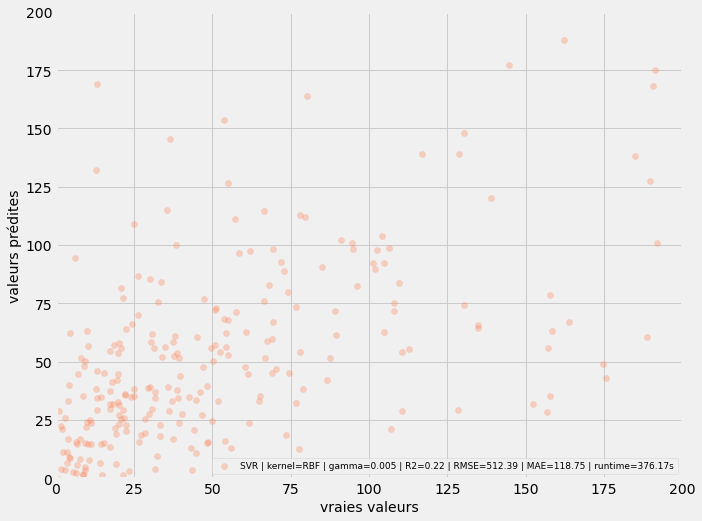

In [265]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_svr,alpha=0.3,color='coral',label= "SVR | kernel=RBF | gamma=0.005 | R2={:.2f} | RMSE={:.2f} | MAE={:.2f} | runtime={:.2f}s".format(best_R2_svr2,best_RMSE_svr2,best_MAE_svr2,temps_exec_svr2))
plt.xlim([0,200])
plt.ylim([0,200])
plt.xlabel('vraies valeurs', fontsize=14)
plt.ylabel('valeurs prédites', fontsize=14)
plt.legend(loc="lower right", prop = {'size': 9}) 

In [266]:
print("Les résultats obtenus avec l'algorithme SVR sur le jeu de test :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", grid_svr.best_params_)
print("Le meilleur coefficient R2: {:.2f}".format(best_R2_svr2))
print("Le meilleur RMSE: {:.2f}".format(best_RMSE_svr2))
print("Le meilleur MAE: {:.2f}".format(best_MAE_svr2))
print("Le temps d'execution de l'algorithme SVR sur le jeu de test : {:.2f}s".format(temps_exec_svr2))   

Les résultats obtenus avec l'algorithme SVR sur le jeu de test :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'C': 15.848931924611142, 'gamma': 0.01, 'kernel': 'linear'}
Le meilleur coefficient R2: 0.22
Le meilleur RMSE: 512.39
Le meilleur MAE: 118.75
Le temps d'execution de l'algorithme SVR sur le jeu de test : 376.17s


Text(0, 0.5, 'R2')

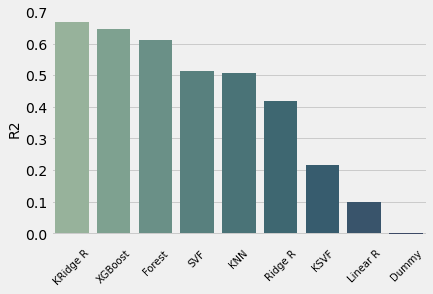

In [267]:
CO2_results_R2 = pd.DataFrame(np.array([[R2_Dummy,R2_best_forest,R2_lin,best_R2_Ridge1,best_R2_Ridge2,best_R2_knn,best_R2_boost,best_R2_svr1,best_R2_svr2]]), columns=["Dummy","Forest","Linear R","Ridge R","KRidge R","KNN","XGBoost","SVF","KSVF"])
CO2_results_R2=CO2_results_R2.sort_values(by=0,ascending=False,axis=1)
CO2_results_R2 = CO2_results_R2.T
CO2_results_R2.columns = ['R2']
sns.barplot(x = CO2_results_R2.index,y = CO2_results_R2["R2"],saturation=.5,palette="crest")
plt.xticks(rotation=45,fontsize=10)
plt.ylabel("R2",fontsize=14)

Text(0, 0.5, 'RMSE')

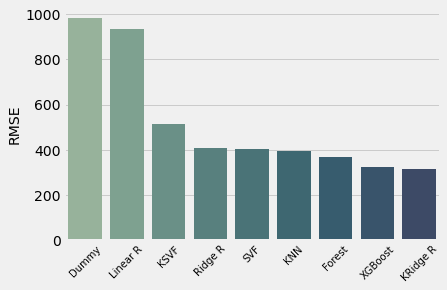

In [268]:
CO2_results_RMSE = pd.DataFrame(np.array([[RMSE_Dummy,RMSE_best_forest,RMSE_lin,best_RMSE_Ridge1,best_RMSE_Ridge2,best_RMSE_knn,best_RMSE_boost,best_RMSE_svr1,best_RMSE_svr2]]), columns=["Dummy","Forest","Linear R","Ridge R","KRidge R","KNN","XGBoost","SVF","KSVF"])
CO2_results_RMSE=CO2_results_RMSE.sort_values(by=0,ascending=False,axis=1)
CO2_results_RMSE = CO2_results_RMSE.T
CO2_results_RMSE.columns = ['RMSE']
sns.barplot(x = CO2_results_RMSE.index,y = CO2_results_RMSE["RMSE"],saturation=.5,palette="crest")
plt.xticks(rotation=45,fontsize=10)
plt.ylabel("RMSE",fontsize=14)

Text(0, 0.5, 'MAE')

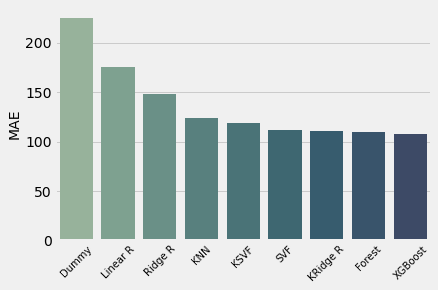

In [269]:
CO2_results_MAE = pd.DataFrame(np.array([[MAE_Dummy,MAE_best_forest,MAE_lin,best_MAE_Ridge1,best_MAE_Ridge2,best_MAE_knn,best_MAE_boost,best_MAE_svr1,best_MAE_svr2]]), columns=["Dummy","Forest","Linear R","Ridge R","KRidge R","KNN","XGBoost","SVF","KSVF"])
CO2_results_MAE=CO2_results_MAE.sort_values(by=0,ascending=False,axis=1)
CO2_results_MAE = CO2_results_MAE.T
CO2_results_MAE.columns = ['MAE']
sns.barplot(x = CO2_results_MAE.index,y = CO2_results_MAE["MAE"],saturation=.5,palette="crest")
plt.xticks(rotation=45,fontsize=10)
plt.ylabel("MAE",fontsize=14)

Text(0, 0.5, 'Runtime')

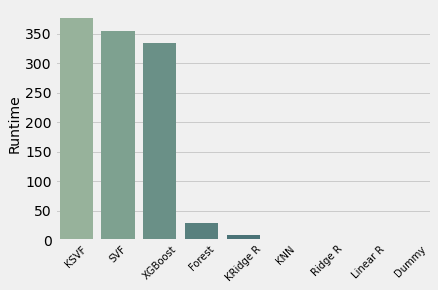

In [270]:
CO2_results_runtime = pd.DataFrame(np.array([[temps_exec_Dummy,temps_exec_forest,temps_exec_lin,temps_exec_Ridge1,temps_exec_Ridge2,temps_exec_Knn,temps_exec_boost,temps_exec_svr1,temps_exec_svr2]]), columns=["Dummy","Forest","Linear R","Ridge R","KRidge R","KNN","XGBoost","SVF","KSVF"])
CO2_results_runtime=CO2_results_runtime.sort_values(by=0,ascending=False,axis=1)
CO2_results_runtime = CO2_results_runtime.T
CO2_results_runtime.columns = ['Runtime']
sns.barplot(x = CO2_results_runtime.index,y = CO2_results_runtime["Runtime"],saturation=.5,palette="crest")
plt.xticks(rotation=45,fontsize=10)
plt.ylabel("Runtime",fontsize=14)

In [271]:
Data_performance_s = pd.DataFrame({'RMSE':[RMSE_Dummy,RMSE_best_forest,RMSE_lin,best_RMSE_Ridge1,best_RMSE_Ridge2,best_RMSE_knn,best_RMSE_boost,best_RMSE_svr1,best_RMSE_svr2],
                              'R2':[R2_Dummy,R2_best_forest,R2_lin,best_R2_Ridge1,best_R2_Ridge2,best_R2_knn,best_R2_boost,best_R2_svr1,best_R2_svr2],
                              'MAE':[MAE_Dummy,MAE_best_forest,MAE_lin,best_MAE_Ridge1,best_MAE_Ridge2,best_MAE_knn,best_MAE_boost,best_MAE_svr1,best_MAE_svr2],
                              'Temps':[temps_exec_Dummy,temps_exec_forest,temps_exec_lin,temps_exec_Ridge1,temps_exec_Ridge2,temps_exec_Knn,temps_exec_boost,temps_exec_svr1,temps_exec_svr2]},
                             index = ["Dummy","Forest","Linear R","Ridge R","KRidge R","KNN","XGBoost","SVF","KSVF"])


In [272]:
Data_performance_s

,RMSE,R2,MAE,Temps
Dummy,982.812778,-0.001139,224.969696,0.001118
Forest,367.756717,0.612554,109.481437,29.528432
Linear R,932.692609,0.098367,175.221528,0.007732
Ridge R,408.629100,0.419567,148.082520,0.098292
KRidge R,314.705897,0.669513,110.328641,9.602862
KNN,394.543410,0.508603,123.817590,0.408378
XGBoost,326.464457,0.645055,107.406338,334.348041
SVF,405.482395,0.514545,111.323698,354.872697
KSVF,512.387539,0.215871,118.754266,376.168664


### Comparaison des différentes **métriques** de performance pour les modèles

$$R^{2} = 1 - \frac{\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}{\sum\limits_{i=1}^n (y_i - \bar{y})^2}    ;    RMSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y_i})^{2}    ;   MAE = \frac{1}{n} \sum\limits_{i=1}^n |y_i - \hat{y_i}| $$


### Le meilleur algorithme de prediction de l'energy est: Gradient boosting

les meilleures valeurs du Coefficient de détermination (R²) et 

de la racine de l'erreur quadratique moyenne RMSE


## ENERGYSTARScore evaluation

In [294]:
X = data.drop(["TotalGHGEmissions","SiteEnergyUseWN(kBtu)","ENERGYSTARScore"],axis=1)
y = data["TotalGHGEmissions"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)


Les meilleurs paramètres de l'algorithme XGBoost sont {'learning_rate': 0.06999999999999999, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
Résultats de la validation croisée de le boost gradient pour:
r2 = 0.399 (+/-0.152) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
r2 = 0.455 (+/-0.119) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
r2 = 0.336 (+/-0.088) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.1}
r2 = 0.425 (+/-0.182) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
r2 = 0.521 (+/-0.123) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
r2 = 0.409 (+/-0.136) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.1}
r2 = 0.416 (+/-0.186) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
r2 = 0.437 (+/-0.085) for {'learning_rate': 0.01, 'max_

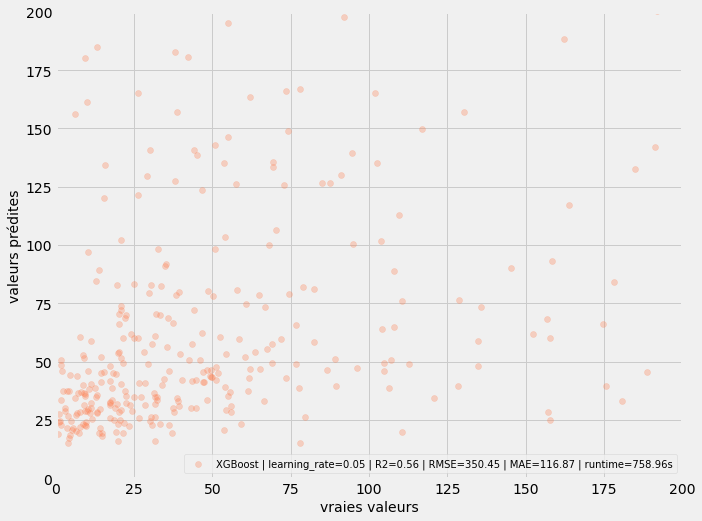

In [295]:
subsample = [0.9,0.5,0.1]
n_estimators = [100,200]
max_depth = [3,5,8,10]
learning_range = np.arange(0.01,0.11,0.01)

param_grid = {'max_depth':max_depth,'learning_rate':learning_range,'subsample':subsample,'n_estimators':n_estimators}

score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False)}


start_time = timeit.default_timer()
grid_pred_xboost = model_selection.GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid,
        cv=5,
        refit="r2",
        scoring=score)
                                    
grid_pred_xboost.fit(X_train_std, y_train)

y_pred_xboost = grid_pred_xboost.predict(X_test_std)

temps_exec = timeit.default_timer() - start_time

print ("Les meilleurs paramètres de l'algorithme XGBoost sont",grid_pred_xboost.best_params_)
print("Résultats de la validation croisée de le boost gradient pour:")
for mean_r2, std_r2, params in zip(
        grid_pred_xboost.cv_results_['mean_test_r2'], 
        grid_pred_xboost.cv_results_['std_test_r2'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_pred_xboost.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_pred_xboost.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_pred_xboost.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_pred_xboost.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))

best_RMSE_avec_Energystar = min(grid_pred_xboost.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_avec_Energystar = max(grid_pred_xboost.cv_results_['mean_test_r2'])
best_MAE_avec_Energystar = min(grid_pred_xboost.cv_results_['mean_test_neg_mean_absolute_error'])

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_xboost,alpha=0.3,color='coral',label= "XGBoost | learning_rate=0.05 | R2={:.2f} | RMSE={:.2f} | MAE={:.2f} | runtime={:.2f}s".format(best_R2,best_RMSE,best_MAE,temps_exec))
plt.xlim([0,200])
plt.ylim([0,200])
plt.xlabel('vraies valeurs', fontsize=14)
plt.ylabel('valeurs prédites', fontsize=14)
plt.legend(loc="lower right", prop = {'size': 10})

In [291]:
print("Voici les résultats obtenus avec l'algorithme gradient boost Regression :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", grid_pred_xboost.best_params_)
print("Le meilleur coefficient de détermination R2 de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}".format(best_R2_avec_Energystar))
print("Le meilleur RMSE de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}".format(best_RMSE_avec_Energystar))
print("Le meilleur MAE de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}".format(best_MAE_avec_Energystar))
print("Le temps d'execution de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}s".format(temps_exec))

Voici les résultats obtenus avec l'algorithme gradient boost Regression :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'learning_rate': 0.06999999999999999, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}
Le meilleur coefficient de détermination R2 de l'algorithme Gradient Boosting Regression sur le jeu de test : 0.56
Le meilleur RMSE de l'algorithme Gradient Boosting Regression sur le jeu de test : 350.45
Le meilleur MAE de l'algorithme Gradient Boosting Regression sur le jeu de test : 116.87
Le temps d'execution de l'algorithme Gradient Boosting Regression sur le jeu de test : 750.43s


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/1.7,y[i], ha = 'center',
                 bbox = dict(facecolor = 'white', alpha = .5))
        
if __name__ == '__main__':
    
    x = ["With ENERGYSTARScore","Without ENERGYSTARScore"]
    y = [0.56,0.67]
      
    plt.figure(figsize = (5,4))
    plt.bar(x, y)
      
    addlabels(x, y)
      
    plt.title("coefficient of determination for Energy prediction \nwith XGBoost Regressor model")
      
    plt.ylabel("R2",fontsize=12)      
    plt.show()

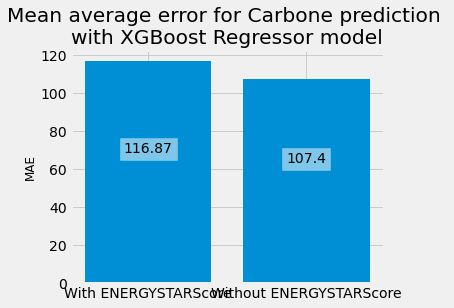

In [288]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/1.7,y[i], ha = 'center',
                 bbox = dict(facecolor = 'white', alpha = .5))
        
if __name__ == '__main__':
    
    x = ["With ENERGYSTARScore","Without ENERGYSTARScore"]
    y = [116.87,107.40]
      
    plt.figure(figsize = (5,4))
    plt.bar(x, y)
      
    addlabels(x, y)
      
    plt.title("Mean average error for Carbone prediction \nwith XGBoost Regressor model")
      
    plt.ylabel("MAE",fontsize=12)      
    plt.show()

In [296]:
Data_compare_CO2 = pd.DataFrame({'Metrique':['RMSE', 'R2', 'MAE'],
                              'Sans ENERGY STAR':[best_RMSE,best_R2,best_MAE],
                              'Avec ENERGY STAR':[best_RMSE_avec_Energystar,best_R2_avec_Energystar, best_MAE_avec_Energystar]})


In [297]:
Data_compare_CO2

,Metrique,Sans ENERGY STAR,Avec ENERGY STAR
0,RMSE,350.446756,350.446756
1,R2,0.562780,0.562780
2,MAE,116.871290,116.871290


# Etape 3 : Amélioration du feature engineering

In [ ]:
#analyse de coefficient de symétrie

Nous allons regarder l'impact du passage à l'échelle logarithmique sur les distribution de la variable cible

In [185]:
X = data.drop(["TotalGHGEmissions","SiteEnergyUseWN(kBtu)"],axis=1)
y = data["TotalGHGEmissions"]
#répartition des données en données train et données test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
#normaliser les données de sorte que les variables auront μ = 0 et σ = 1
std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

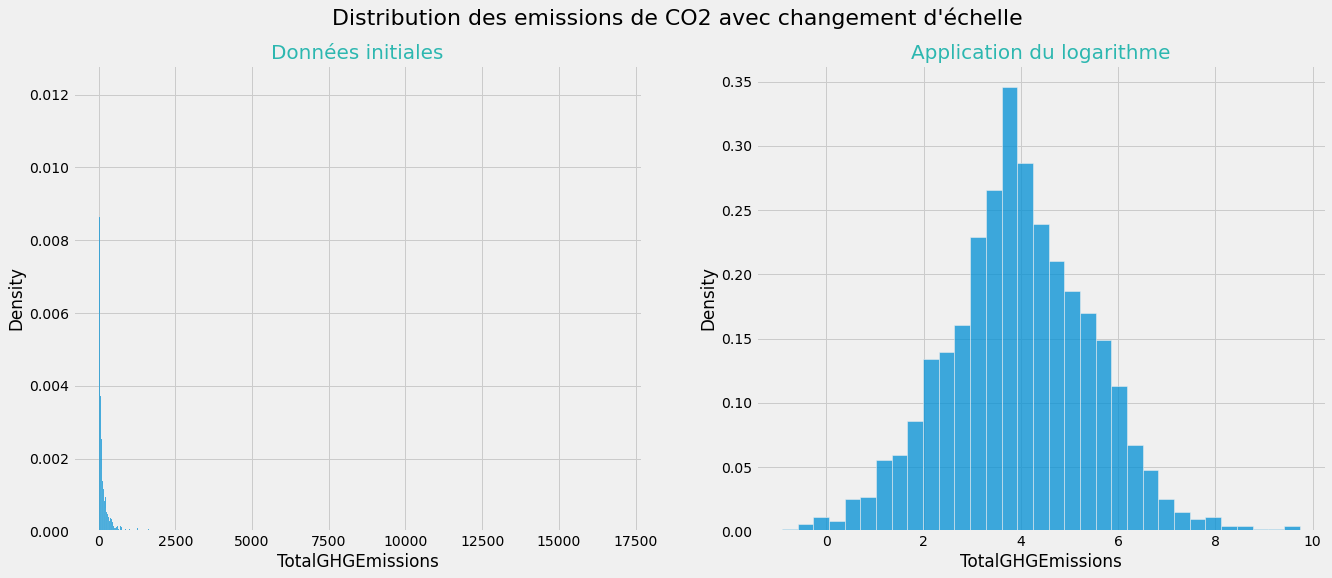

In [186]:
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=y, stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0', fontsize=20)
sns.histplot(data=Y_log, stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0', fontsize=20)
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontsize=22)
plt.show()

In [298]:
data_log = data.copy()

In [299]:
test_co2 = np.log2(1+data_log['TotalGHGEmissions'])
test_site = np.log2(1+data_log['SiteEnergyUseWN(kBtu)'])

In [300]:
data_log['Log2-TotalGHGEmissions'] = test_co2
data_log['Log2-SiteEnergyUseWN(kBtu)'] = test_site

In [301]:
X_log = data_log.drop(['Log2-TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis = 1)
y_log = data_log['Log2-TotalGHGEmissions']

In [303]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size = 0.20)
print('X_train_log shape:', X_train.shape)
print('X_test_log shape:', X_test.shape)
print('y_train_log shape:', y_train.shape)
print('y_test_log shape:', y_test.shape)


X_train_log shape: (1216, 35)
X_test_log shape: (406, 35)
y_train_log shape: (1216,)
y_test_log shape: (406,)


In [304]:
#Starditsation des features 
std = StandardScaler().fit(X_train_log)
X_train_std = std.transform(X_train_log)
X_test_log_std = std.transform(X_test_log)

### Cible: ``TotalGHGEmissions``

Les meilleurs paramètres de l'algorithme XGBoost sont {'learning_rate': 0.060000000000000005, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Résultats de la validation croisée de le boost gradient pour:
r2 = 0.851 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
r2 = 0.850 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
r2 = 0.840 (+/-0.009) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.1}
r2 = 0.977 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
r2 = 0.976 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
r2 = 0.970 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.1}
r2 = 0.863 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
r2 = 0.862 (+/-0.002) for {'learning_rate': 0.01, 'max

ValueError: x and y must be the same size

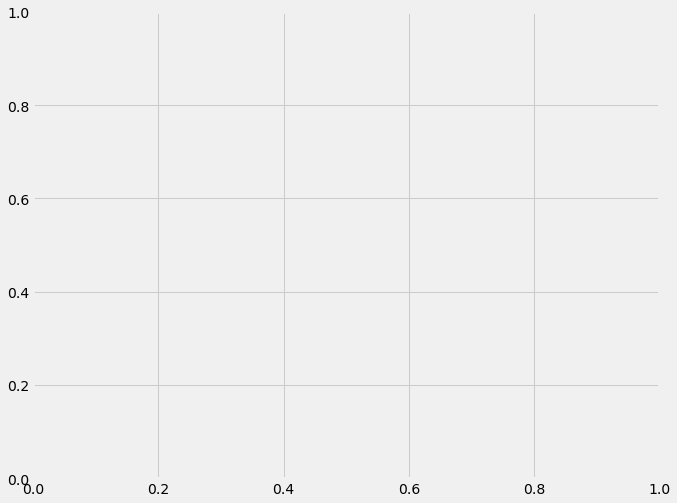

In [307]:
subsample = [0.9,0.5,0.1]
n_estimators = [100,200]
max_depth = [3,5,8,10]
learning_range = np.arange(0.01,0.11,0.01)

param_grid = {'max_depth':max_depth,'learning_rate':learning_range,'subsample':subsample,'n_estimators':n_estimators}

score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False)}


start_time = timeit.default_timer()
grid_pred_xboost = model_selection.GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid,
        cv=5,
        refit="r2",
        scoring=score)
                                    
grid_pred_xboost.fit(X_train_std, y_train_log)

y_pred_xboost = grid_pred_xboost.predict(X_test_log_std)

temps_exec = timeit.default_timer() - start_time

print ("Les meilleurs paramètres de l'algorithme XGBoost sont",grid_pred_xboost.best_params_)
print("Résultats de la validation croisée de le boost gradient pour:")
for mean_r2, std_r2, params in zip(
        grid_pred_xboost.cv_results_['mean_test_r2'], 
        grid_pred_xboost.cv_results_['std_test_r2'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )
for mean_mae, std_mae, params in zip(
        grid_pred_xboost.cv_results_['mean_test_neg_mean_absolute_error'], 
        grid_pred_xboost.cv_results_['std_test_neg_mean_absolute_error'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("MAE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_mae,
        std_mae,
        params
    ))
for mean_rmse, std_rmse, params in zip(
        grid_pred_xboost.cv_results_['mean_test_neg_root_mean_squared_error'], 
        grid_pred_xboost.cv_results_['std_test_neg_root_mean_squared_error'], 
        grid_pred_xboost.cv_results_['params']           
    ):

    print("RMSE = {:.3f} (+/-{:.03f}) for {}".format(
        mean_rmse,
        std_rmse,
        params
    ))

best_RMSE_log = min(grid_pred_xboost.cv_results_['mean_test_neg_root_mean_squared_error'])
best_R2_log = max(grid_pred_xboost.cv_results_['mean_test_r2'])
best_MAE_log = min(grid_pred_xboost.cv_results_['mean_test_neg_mean_absolute_error'])

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_xboost,alpha=0.3,color='coral',label= "XGBoost | learning_rate=0.05 | R2={:.2f} | RMSE={:.2f} | MAE={:.2f} | runtime={:.2f}s".format(best_R2,best_RMSE,best_MAE,temps_exec))
plt.xlim([0,200])
plt.ylim([0,200])
plt.xlabel('vraies valeurs', fontsize=14)
plt.ylabel('valeurs prédites', fontsize=14)
plt.legend(loc="lower right", prop = {'size': 10})

In [194]:
print("Voici les résultats obtenus avec l'algorithme gradient boost Regression :")
print("Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont", grid_pred_xboost.best_params_)
print("Le meilleur coefficient de détermination R2 de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}".format(best_R2_log))
print("Le meilleur RMSE de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}".format(best_RMSE_log))
print("Le meilleur MAE de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}".format(best_MAE_log))
print("Le temps d'execution de l'algorithme Gradient Boosting Regression sur le jeu de test : {:.2f}s".format(temps_exec))


- Voici les résultats obtenus avec l'algorithme Kernel Ridge Regression en utilisant un noyau de type 
 Radial Basis Function (RBF) :
Les meilleurs paramètres obtenus avec la méthode GridSearchCV sont {'alpha': 0.01, 'gamma': 0.01}
Le meilleur coefficient de détermination R2 : 0.62
Le meilleur RMSE de l'algorithme : 1.25
Le meilleur MAE de l'algorithme : 0.83


In [195]:
param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}
score = {'r2':make_scorer(r2_score),'neg_mean_absolute_error':make_scorer(mean_absolute_error),'neg_root_mean_squared_error': make_scorer(mean_squared_error,squared=False)}
#score = ('r2','neg_mean_absolute_error','neg_root_mean_squared_error' )

model_forest = RandomForestRegressor(random_state=42)

start_time_forest = timeit.default_timer()
grid_pred_forest = model_selection.GridSearchCV(
    model_forest,
    param_grid,
    refit='r2',
    cv=5,  
    scoring= score)


grid_pred_forest.fit(X_train_std, y_train_log)

y_hat_forest = grid_pred_forest.predict(X_test_log_std)

elapsed_time_forest = timeit.default_timer() - start_time_forest

In [196]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(grid_pred_forest.best_params_)

print("Résultats de la validation croisée de la régression svr pour:")
for mean_r2, std_r2, params in zip(
        grid_pred_forest.cv_results_['mean_test_r2'], 
        grid_pred_forest.cv_results_['std_test_r2'], 
        grid_pred_forest.cv_results_['params']           
    ):

    print("r2 = {:.3f} (+/-{:.03f}) for {}".format(
        mean_r2,
        std_r2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}
Résultats de la validation croisée de la régression svr pour:
r2 = 0.862 (+/-0.013) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
r2 = 0.865 (+/-0.014) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
r2 = 0.867 (+/-0.012) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
r2 = 0.857 (+/-0.022) for {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}
r2 = 0.830 (+/-0.014) for {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
r2 = 0.825 (+/-0.013) for {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
r2 = 0.941 (+/-0.012) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}
r2 = 0.952 (+/-0.008) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
r2 = 0.954 (+/-0.007) for {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
r2 = 0.932 (+/-0.016) for 

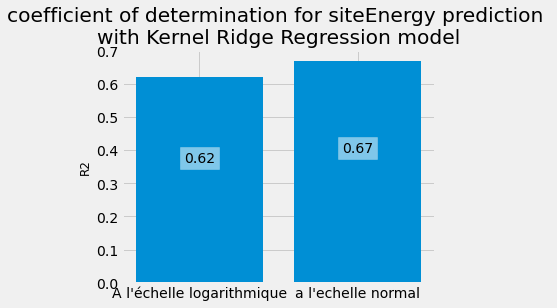

In [308]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/1.7,y[i], ha = 'center',
                 bbox = dict(facecolor = 'white', alpha = .5))
        
if __name__ == '__main__':
    
    x = ["A l'échelle logarithmique","a l'echelle normal"]
    y = [0.62,0.67]
      
    plt.figure(figsize = (5,4))
    plt.bar(x, y)
      
    addlabels(x, y)
      
    plt.title("coefficient of determination for siteEnergy prediction \nwith Kernel Ridge Regression model")
      
    plt.ylabel("R2",fontsize=12)      
    plt.show()

## feature importance des variables locale et globale

In [198]:
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [199]:
model = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= 42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [200]:
importances = model.feature_importances_

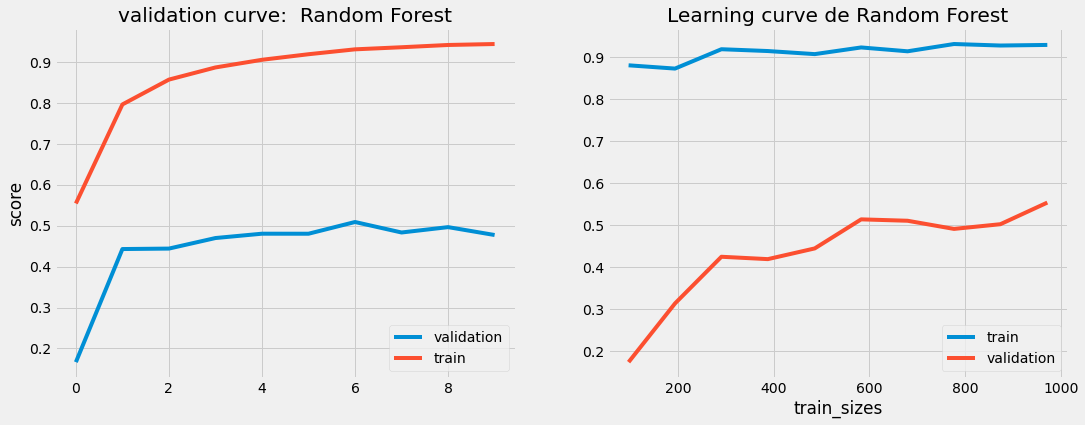

In [279]:

fig = plt.figure(1, figsize=(25, 6))



rf = RandomForestRegressor(random_state=42)


plt.subplot(131)
train_scores, valid_scores = validation_curve(rf,X_train, y_train,
                                              param_name="max_depth",
                                              param_range=np.arange(1, 11), cv=5)
plt.plot(valid_scores.mean(axis=1), label='validation')
plt.plot(train_scores.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel(' ')
plt.title("validation curve:  Random Forest")
plt.legend()

plt.subplot(132)
model_forest = grid_pred_forest.best_estimator_
train_sizes, train_scores, valid_scores = learning_curve(model_forest, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)
#print(train_sizes)
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.title('Learning curve de Random Forest')
plt.legend()

Validation curve

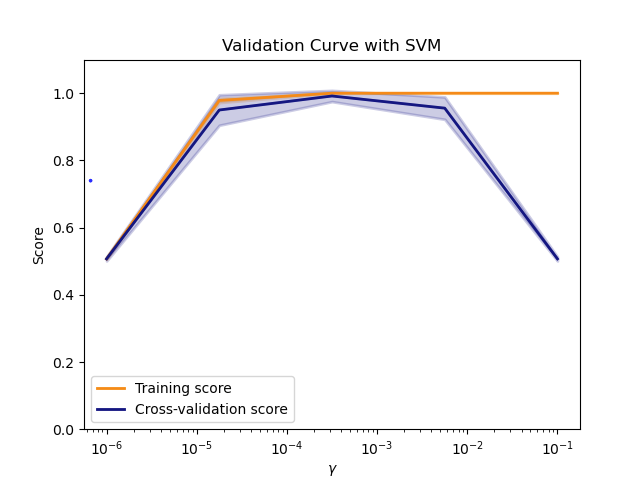
## underfitting(sous apprenttissage) => Si le score d'entraînement et le score de validation sont tous deux faibles.
## overfitting (surapprentissage ) => Si le score d'apprentissage est élevé et le score de validation est faible,
sinon il fonctionne très bien.

Un score de formation faible et un score de validation élevé ne sont généralement pas possibles.

Learning curve
Une courbe d'apprentissage montre le score de validation et d'apprentissage d'un estimateur pour un nombre variable d'échantillons d'apprentissage. C'est un outil pour savoir à quel point nous bénéficions de l'ajout de données d'apprentissage supplémentaires et si l'estimateur souffre davantage d'une erreur de variance ou d'une erreur de biais

In [201]:
liste_variables = list((data.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'], axis = 1)).columns)

Text(0.5, 0, 'Relative Importance')

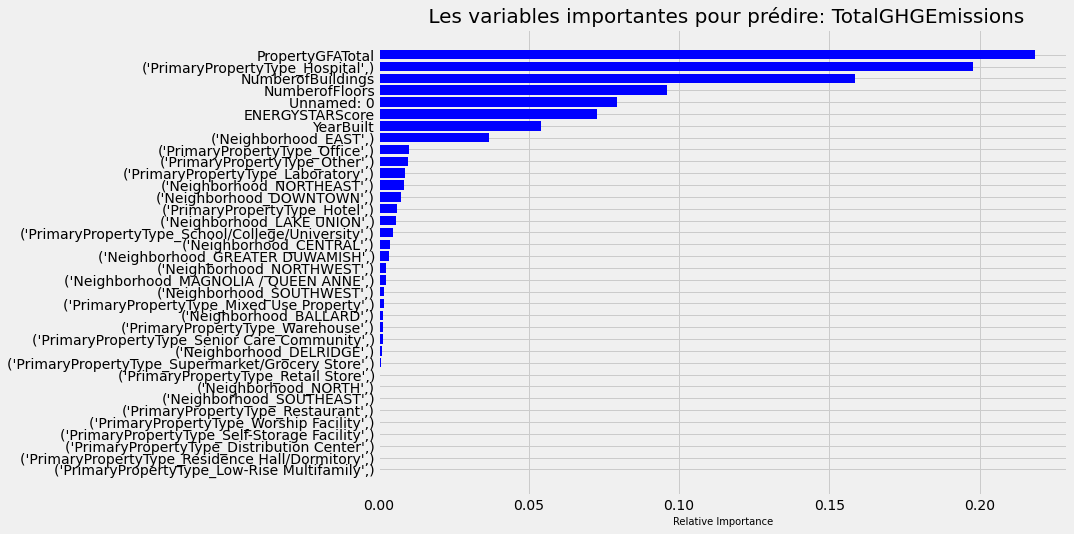

In [202]:
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,8)) 
plt.title(' Les variables importantes pour prédire: TotalGHGEmissions', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=10)

In [203]:
pip install shap

In [204]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [205]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 326it [15:04,  2.81s/it]                         


In [206]:
shap_values

.values =
array([[ 4.64592401e+01,  1.82287110e-01,  0.00000000e+00, ...,
        -4.87481572e-01,  1.09144438e+01, -5.98390793e+01],
       [-1.02293837e+01,  1.29010167e-01,  0.00000000e+00, ...,
        -6.16144881e+00, -3.26198791e+01, -2.13592170e+01],
       [-1.82106752e+01,  1.63137357e-01,  0.00000000e+00, ...,
        -1.46913677e+01, -5.55454061e+01,  3.68568931e+01],
       ...,
       [ 6.31505268e+00,  3.02588695e-01,  0.00000000e+00, ...,
        -2.47285250e+01,  6.84993745e+01,  1.00616343e+02],
       [-1.16966676e+01,  1.47421092e-01,  0.00000000e+00, ...,
         4.52939047e+01,  1.53622058e+02, -6.50475146e+01],
       [-7.06204859e+00,  1.23783527e-01,  0.00000000e+00, ...,
        -1.61647444e+01, -5.39530333e+01, -2.83490015e+01]])

.base_values =
array([123.61268486, 123.61268486, 123.61268486, 123.61268486,
       123.61268486, 123.61268486, 123.61268486, 123.61268486,
       123.61268486, 123.61268486, 123.61268486, 123.61268486,
       123.61268486, 123.612

## Résumé global

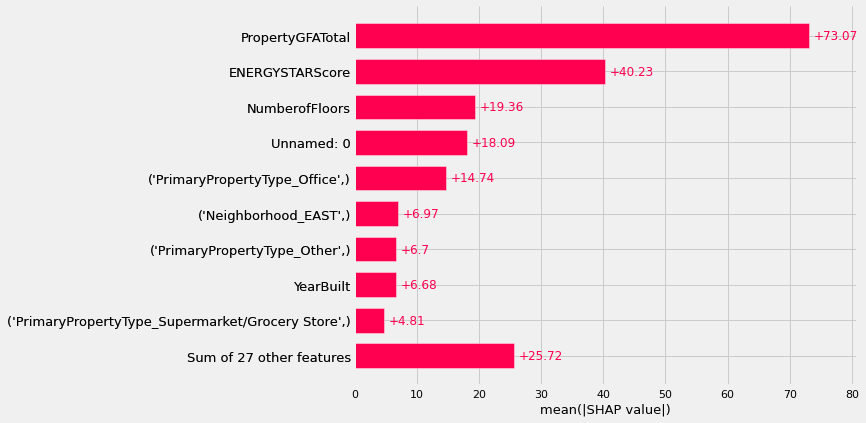

In [207]:
shap.plots.bar(shap_values)

In [208]:
import matplotlib

In [209]:
import matplotlib.pyplot as plot

## Résumé de l’intrigue: beeswarm

In [210]:
shap.summary_plot

<function shap.plots._beeswarm.summary_legacy(shap_values, features=None, feature_names=None, max_display=None, plot_type=None, color=None, axis_color='#333333', title=None, alpha=1, show=True, sort=True, color_bar=True, plot_size='auto', layered_violin_max_num_bins=20, class_names=None, class_inds=None, color_bar_label='Feature value', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x0000015BC5D4CE20>, auto_size_plot=None, use_log_scale=False)>

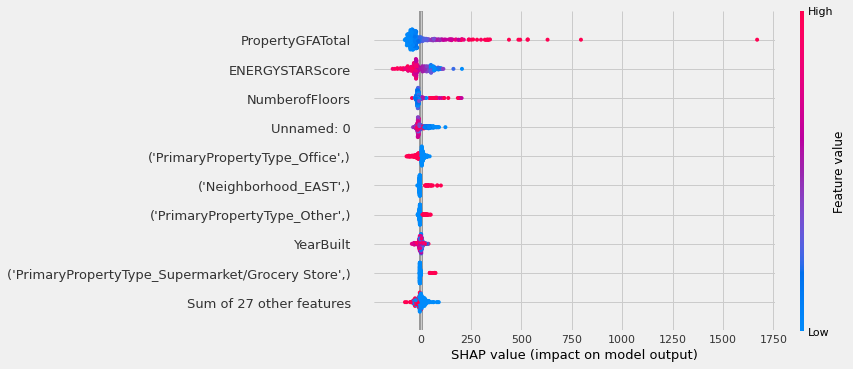

In [211]:
shap.plots.beeswarm(shap_values)

## Tracage d'une seule instance

## Parcelle en cascade

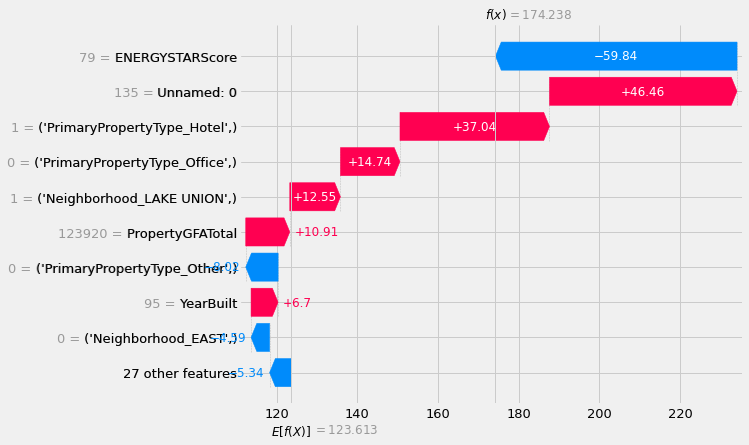

In [212]:
shap.plots.waterfall(shap_values[0])

## Terrain de bar local

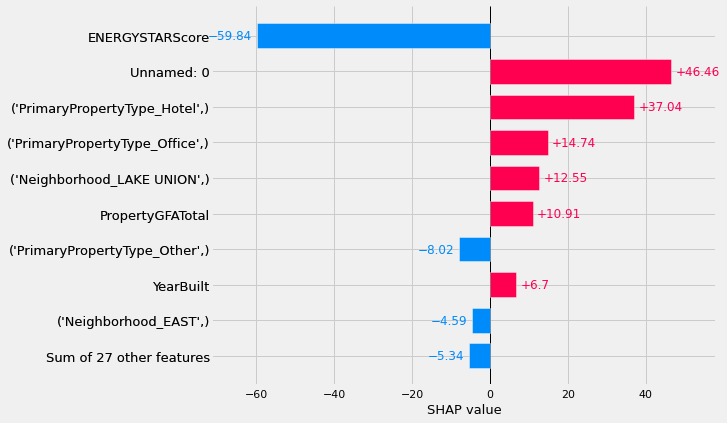

In [213]:
shap.plots.bar(shap_values[0])

In [276]:
score_train = model_GHG.score(X_train, y_train)
print("Score of the best model on the train set: R² = {:.3f}".format(score_train))

score_test_GHG = model_GHG.score(X_test, y_test)
print("Score of the best model on the test set: R² = {:.3f}".format(score_test_GHG))

NameError: name 'model_GHG' is not defined